In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
df=pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752.0,301.0,4.0,267,3.720000e+18,STAR,-0.000009,3306.0,54922.0,491
1,1.240000e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752.0,301.0,4.0,267,3.640000e+17,STAR,-0.000055,323.0,51615.0,541
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752.0,301.0,4.0,268,3.230000e+17,GALAXY,0.123111,287.0,52023.0,513
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752.0,301.0,4.0,269,3.720000e+18,STAR,-0.000111,3306.0,54922.0,510
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752.0,301.0,4.0,269,3.720000e+18,STAR,0.000590,3306.0,54922.0,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.240000e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345.0,301.0,3.0,161,5.030000e+17,GALAXY,0.027583,447.0,51877.0,246
9996,1.240000e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345.0,301.0,3.0,162,5.030000e+17,GALAXY,0.117772,447.0,51877.0,228
9997,1.240000e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345.0,301.0,3.0,162,8.220000e+18,STAR,-0.000402,7303.0,57013.0,622
9998,1.240000e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345.0,301.0,3.0,163,5.030000e+17,GALAXY,0.014019,447.0,51877.0,229


In [3]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752.0,301.0,4.0,267,3.720000e+18,STAR,-0.000009,3306.0,54922.0,491
1,1.240000e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752.0,301.0,4.0,267,3.640000e+17,STAR,-0.000055,323.0,51615.0,541
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752.0,301.0,4.0,268,3.230000e+17,GALAXY,0.123111,287.0,52023.0,513
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752.0,301.0,4.0,269,3.720000e+18,STAR,-0.000111,3306.0,54922.0,510
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752.0,301.0,4.0,269,3.720000e+18,STAR,0.000590,3306.0,54922.0,512


In [4]:
df.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.240000e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345.0,301.0,3.0,161,5.030000e+17,GALAXY,0.027583,447.0,51877.0,246
9996,1.240000e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345.0,301.0,3.0,162,5.030000e+17,GALAXY,0.117772,447.0,51877.0,228
9997,1.240000e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345.0,301.0,3.0,162,8.220000e+18,STAR,-0.000402,7303.0,57013.0,622
9998,1.240000e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345.0,301.0,3.0,163,5.030000e+17,GALAXY,0.014019,447.0,51877.0,229
9999,1.240000e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345.0,301.0,3.0,163,5.030000e+17,GALAXY,0.118417,447.0,51877.0,233


In [5]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run          float64
rerun        float64
camcol       float64
field          int64
specobjid    float64
class         object
redshift     float64
plate        float64
mjd          float64
fiberid        int64
dtype: object

In [6]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        9974 non-null   float64
 3   u          9898 non-null   float64
 4   g          9909 non-null   float64
 5   r          9923 non-null   float64
 6   i          9923 non-null   float64
 7   z          9905 non-null   float64
 8   run        9987 non-null   float64
 9   rerun      9987 non-null   float64
 10  camcol     9995 non-null   float64
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      9990 non-null   float64
 16  mjd        9990 non-null   float64
 17  fiberid    10000 non-null  int64  
dtypes: float64(15), int64(2), object(1)
memory usage: 1.4+ MB


In [8]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,9974.000000,9898.000000,9909.000000,9923.000000,9923.000000,9905.000000,9987.000000,9987.0,9995.000000,10000.000000,1.000000e+04,10000.000000,9990.000000,9990.000000,10000.000000
mean,1.240000e+18,175.529987,14.874581,18.619702,17.372306,16.841783,16.584387,16.423915,981.327726,301.0,3.648524,302.380100,1.644890e+18,0.143726,1460.369970,52942.858659,353.069400
std,0.000000e+00,47.783439,25.233794,0.828919,0.946156,1.067899,1.142103,1.203312,273.362151,0.0,1.666581,162.577763,2.013758e+18,0.388774,1789.175107,1511.197379,206.298149
min,1.240000e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,3.000000e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.240000e+18,157.370946,-0.542791,18.178418,16.815640,16.175050,15.855005,15.619920,752.000000,301.0,2.000000,184.000000,3.390000e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.240000e+18,180.394514,0.408355,18.853435,17.494830,16.857850,16.554670,16.389960,756.000000,301.0,4.000000,299.000000,4.970000e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.240000e+18,201.547279,36.235362,19.259548,18.010510,17.513040,17.258770,17.141260,1331.000000,301.0,5.000000,414.000000,2.880000e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.240000e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.470000e+18,5.353854,8410.000000,57481.000000,1000.000000


In [9]:
df.isna().sum()

objid          0
ra             0
dec           26
u            102
g             91
r             77
i             77
z             95
run           13
rerun         13
camcol         5
field          0
specobjid      0
class          0
redshift       0
plate         10
mjd           10
fiberid        0
dtype: int64

In [10]:
df['dec'].unique()

array([ 0.08969303,  0.13528503,  0.12618509, ..., 51.66698638,
       51.75306779, 51.80530747], shape=(9975,))

In [11]:
df['u'].unique()

array([19.47406, 18.6628 , 19.38298, ..., 18.75818, 18.88287, 19.27586],
      shape=(9631,))

In [12]:
df['g'].unique()

array([17.0424 , 17.21449, 18.19169, ..., 17.77784, 17.91068, 17.37829],
      shape=(9730,))

In [13]:
df['r'].unique()

array([15.94699, 16.67637, 17.47428, ..., 17.51872, 17.53152, 16.30542],
      shape=(9777,))

In [14]:
df['i'].unique()

array([15.50342, 16.48922, 17.08732, ..., 17.43302, 17.36284, 15.83548],
      shape=(9816,))

In [15]:
df['z'].unique()

array([15.22531, 16.3915 , 16.80125, ..., 17.42048, 17.13988, 15.50588],
      shape=(9804,))

In [16]:
df['run'].unique()

array([ 752.,  756.,  308.,  727.,  745., 1035.,   nan, 1045., 1140.,
       1231., 1332., 1334., 1302., 1239., 1119., 1331., 1345., 1350.,
       1404., 1412., 1336., 1402., 1411., 1356.])

In [17]:
df['rerun'].unique()

array([301.,  nan])

In [18]:
df['camcol'].unique()

array([ 4.,  2.,  1.,  5.,  6.,  3., nan])

In [19]:
df['plate'].unique()

array([3306.,  323.,  287.,  324.,  288., 2558., 2568., 3846., 3771.,
        274., 3833.,  275., 2559., 2569., 2389., 3786., 2409., 3834.,
        276.,  307.,  306.,  536., 4025., 4022.,  308., 2934., 2909.,
       4745., 2057., 2077., 1149., 4788., 7450., 7451.,  346.,  345.,
        282.,  343.,  364.,  299.,  300., 4043., 4040., 4041.,  301.,
       4037.,  289.,  270.,  271., 3831.,  272., 3835., 3772.,  277.,
        537.,  309., 4019., 4018.,  348., 2895.,  291.,  290., 4016.,
        310.,  266.,  480., 3827.,  267., 3828.,  268., 2867., 2852.,
       3848., 2920., 3154.,  481.,  500.,  501.,  302.,  303., 3314.,
        342., 4668.,  424.,  425., 4665., 4661.,  426.,   nan,  269.,
       3832.,  273., 3836., 3787., 3773.,  278., 3825.,  476., 3826.,
        477., 4737.,  502., 4738., 3830.,  304., 4032.,  305., 4028.,
        918., 4029.,  293.,  294., 4052., 4051., 7456., 2901.,  539.,
        311.,  312., 2952., 4014., 3829.,  462., 2050., 2070.,  463.,
       1634., 7253.,

In [20]:
df['mjd'].unique()

array([54922., 51615., 52023., 51666., 52000., 54140., 54153., 55327.,
       55544., 51913., 55290., 51910., 54208., 54234., 54213., 55563.,
       54210., 56014., 51909., 51663., 51637., 52024., 55350., 55352.,
       51662., 54626., 54653., 55892., 53816., 53846., 53003., 55889.,
       56722., 56739., 51693., 51690., 51658., 51692., 51671., 51943.,
       55630., 55605., 55361., 51942., 55631., 51990., 51883., 55543.,
       51941., 55570., 55277., 51908., 52027., 51994., 55363., 55622.,
       54567., 51928., 55632., 51630., 51989., 55565., 51608., 55539.,
       51633., 54479., 54468., 55647., 54562., 54821., 52235., 51688.,
       54970., 51691., 56211., 51893., 51898., 56209., 55614., 51882.,
          nan, 55289., 51957., 55302., 55240., 51900., 55533., 52314.,
       52026., 55650., 55574., 51609., 55333., 51613., 55621., 52404.,
       55618., 51696., 51689., 51986., 55600., 55337., 55589., 56727.,
       54652., 52017., 51665., 54559., 55300., 53401., 53729., 53299.,
      

In [21]:
df['dec']=df['dec'].fillna(df['dec'].mean())
df['u']=df['u'].fillna(df['u'].mean())
df['g']=df['g'].fillna(df['g'].mean())
df['r']=df['r'].fillna(df['r'].mean())
df['i']=df['i'].fillna(df['i'].mean())
df['z']=df['z'].fillna(df['z'].mean())
df['run']=df['run'].fillna(df['run'].mean())
df['rerun']=df['rerun'].fillna(df['rerun'].mean())
df['camcol']=df['camcol'].fillna(df['camcol'].mean())
df['plate']=df['plate'].fillna(df['plate'].mean())
df['mjd']=df['mjd'].fillna(df['mjd'].mean())

In [22]:
df.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [23]:
df.drop(['objid', 'specobjid','rerun'],inplace=True,axis=1)

In [24]:
import warnings
warnings.filterwarnings("ignore")

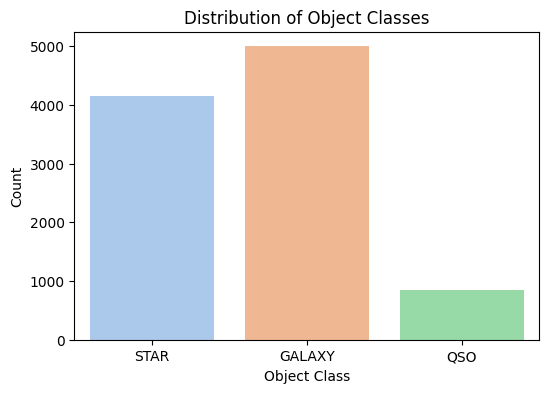

In [25]:
plt.figure(figsize=(6, 4))
sb.countplot(data=df, x='class', palette='pastel')
plt.title("Distribution of Object Classes")
plt.xlabel("Object Class")
plt.ylabel("Count")
plt.show()


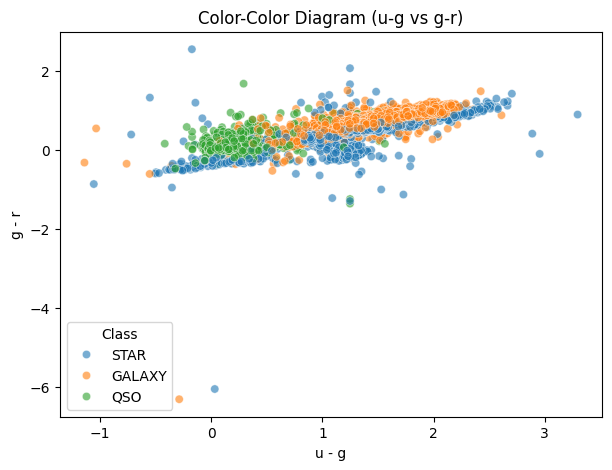

In [26]:
df['u_g'] = df['u'] - df['g']
df['g_r'] = df['g'] - df['r']

plt.figure(figsize=(7, 5))
sb.scatterplot(data=df, x='u_g', y='g_r', hue='class', alpha=0.6)
plt.title("Color-Color Diagram (u-g vs g-r)")
plt.xlabel("u - g")
plt.ylabel("g - r")
plt.legend(title="Class")
plt.show()


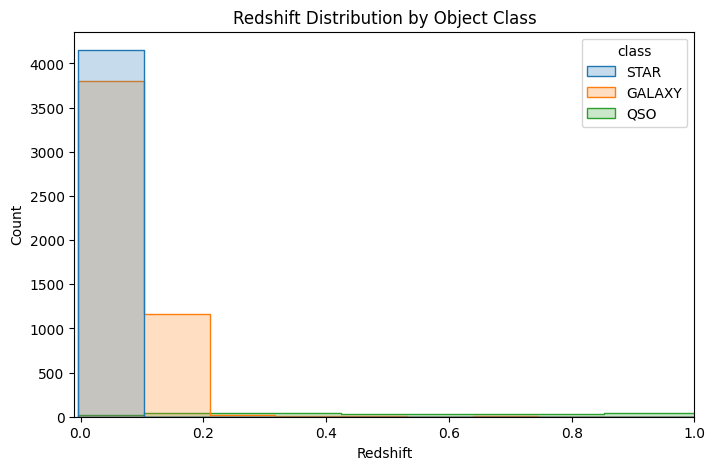

In [27]:
plt.figure(figsize=(8, 5))
sb.histplot(data=df, x='redshift', hue='class', element='step', common_norm=False, bins=50)
plt.title("Redshift Distribution by Object Class")
plt.xlabel("Redshift")
plt.ylabel("Count")
plt.xlim(-0.01, 1)  # optional: to zoom in
plt.show()


<Axes: >

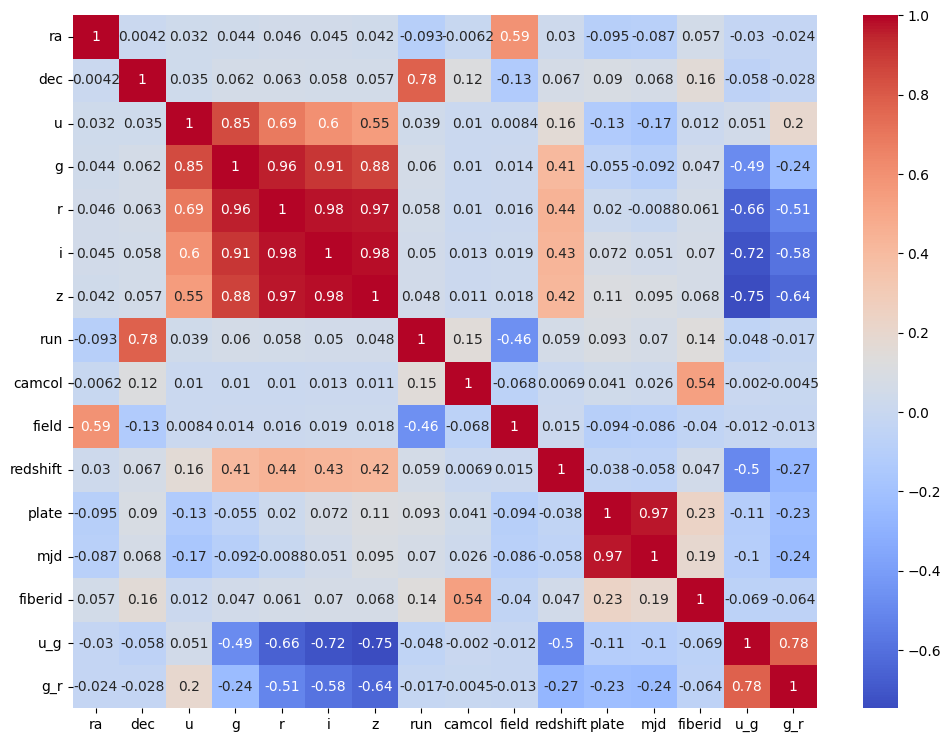

In [29]:
plt.figure(figsize=(12,9))
corr=df.corr(numeric_only=True)
sb.heatmap(corr,annot=True,cmap='coolwarm')

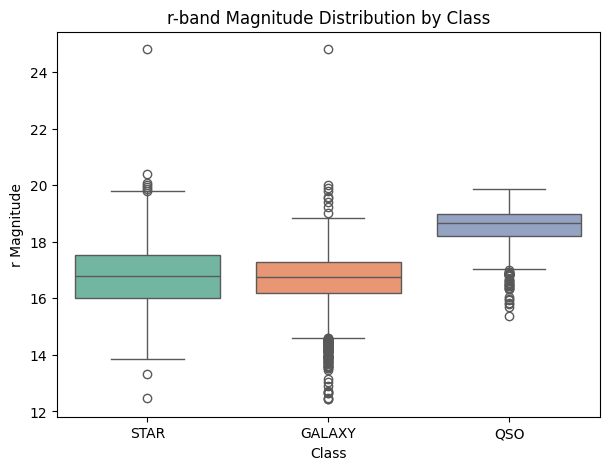

In [30]:
plt.figure(figsize=(7, 5))
sb.boxplot(data=df, x='class', y='r', palette='Set2')
plt.title("r-band Magnitude Distribution by Class")
plt.xlabel("Class")
plt.ylabel("r Magnitude")
plt.show()


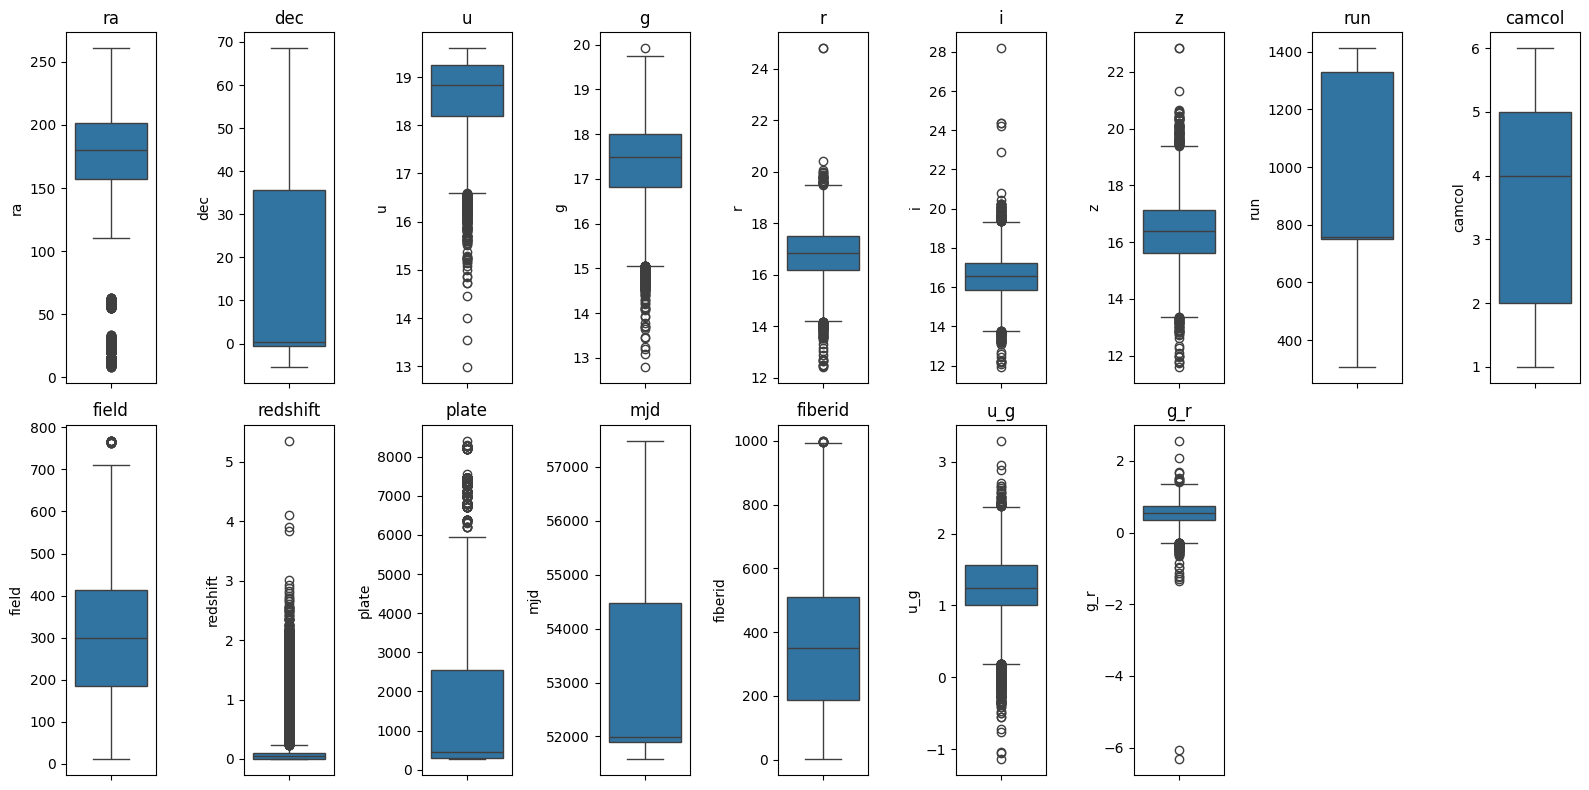

In [31]:
num_col=df.select_dtypes(include="number").columns
plt.figure(figsize=(16,8))
for i,col in enumerate(num_col):
    plt.subplot(2,len(num_col)//2 + 1, i+1)
    sb.boxplot(df[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

In [32]:
outlier_columns=['ra','dec','u','g','r','i','z','run','camcol','field','redshift','plate','mjd','fiberid','u_g','g_r']
for col in outlier_columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    print(col)
    upper_array=np.array(df[col] >= upper)
    print("upper_bound",upper)
    print(upper_array.sum())

    lower_array=np.array(df[col] <= lower)
    print("lower_bound",lower)
    print(lower_array.sum())

    mean=df[col].mean()
    for i in df.index:
        if ((df.loc[i,col]>=upper) or (df.loc[i,col]<=lower)):
            df.loc[i,col]=mean

ra
upper_bound 267.81177836250004
0
lower_bound 91.10644646249999
508
dec
upper_bound 89.932043809625
0
lower_bound -54.821682329375
0
u
upper_bound 20.858646250000003
0
lower_bound 16.586956249999997
280
g
upper_bound 19.773322499999995
1
lower_bound 15.055762500000004
179
r
upper_bound 19.496057500000003
31
lower_bound 14.191237499999996
78
i
upper_bound 19.342065
67
lower_bound 13.770624999999999
55
z
upper_bound 19.393916250000004
83
lower_bound 13.366366249999997
46
run
upper_bound 2199.5
0
lower_bound -116.5
0
camcol
upper_bound 9.5
0
lower_bound -2.5
0
field
upper_bound 759.0
25
lower_bound -161.0
0
redshift
upper_bound 0.23132492500000001
809
lower_bound -0.13866551500000002
0
plate
upper_bound 5946.0
493
lower_bound -3086.0
0
mjd
upper_bound 58320.0
0
lower_bound 48048.0
0
fiberid
upper_bound 994.875
8
lower_bound -298.125
0
u_g
upper_bound 2.3782087500000033
40
lower_bound 0.18895874999999496
509
g_r
upper_bound 1.375776249999992
10
lower_bound -0.2804337499999918
134


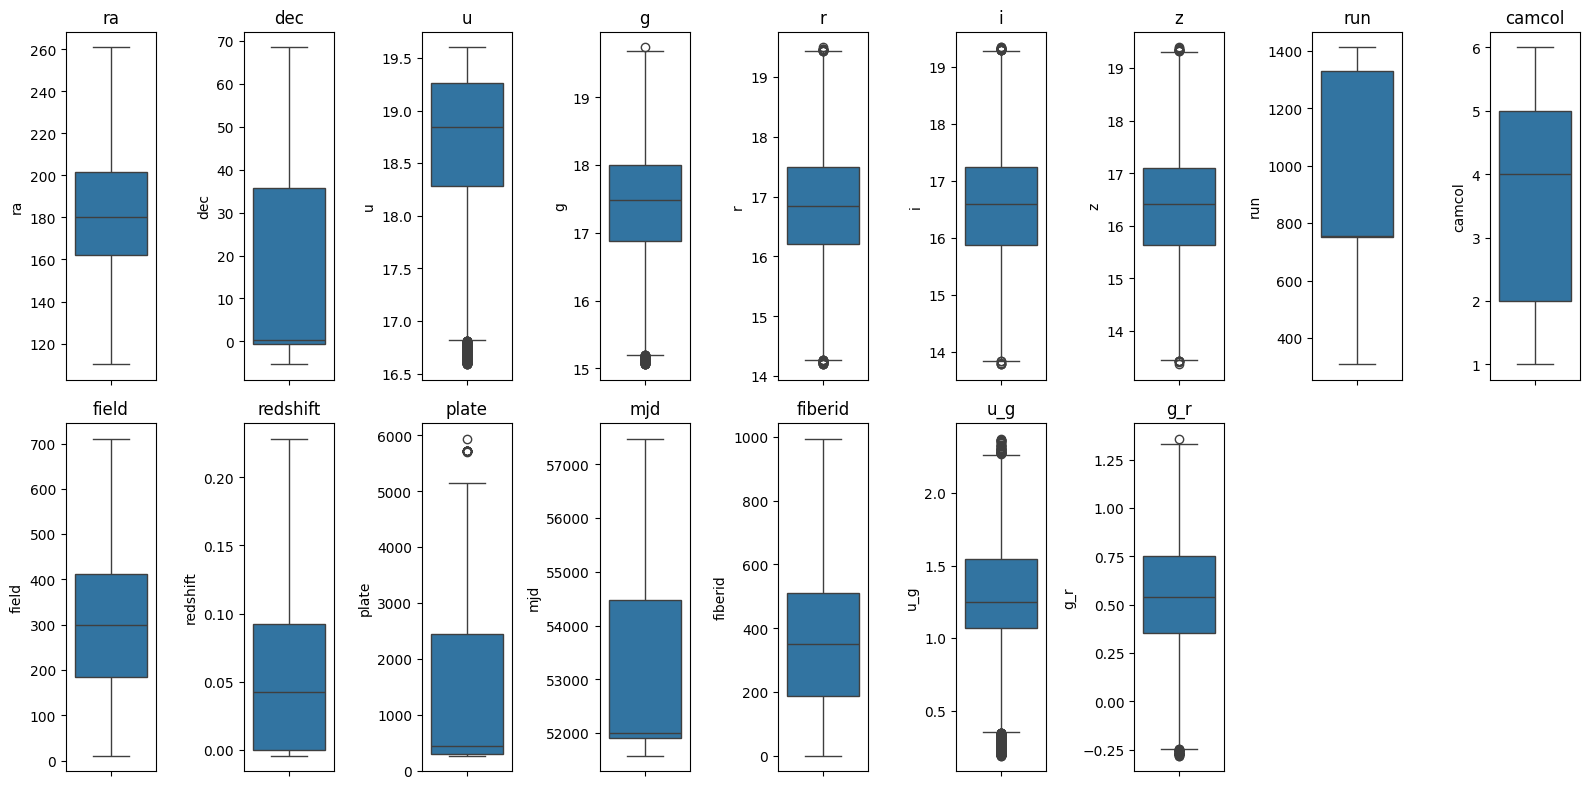

In [33]:
num_col=df.select_dtypes(include="number").columns
plt.figure(figsize=(16,8))
for i,col in enumerate(num_col):
    plt.subplot(2,len(num_col)//2 + 1, i+1)
    sb.boxplot(df[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

In [34]:
x=df.drop(['class'],axis=1).values
y=df['class'].values

In [35]:
x

array([[1.83531326e+02, 8.96930300e-02, 1.94740600e+01, ...,
        4.91000000e+02, 1.24739586e+00, 1.09541000e+00],
       [1.83598370e+02, 1.35285032e-01, 1.86628000e+01, ...,
        5.41000000e+02, 1.44831000e+00, 5.38120000e-01],
       [1.83680207e+02, 1.26185092e-01, 1.93829800e+01, ...,
        5.13000000e+02, 1.19129000e+00, 7.17410000e-01],
       ...,
       [1.31552562e+02, 5.16669864e+01, 1.87581800e+01, ...,
        6.22000000e+02, 9.80340000e-01, 2.59120000e-01],
       [1.31477151e+02, 5.17530678e+01, 1.88828700e+01, ...,
        2.29000000e+02, 9.72190000e-01, 3.79160000e-01],
       [1.31665012e+02, 5.18053075e+01, 1.92758600e+01, ...,
        2.33000000e+02, 1.89757000e+00, 1.07287000e+00]],
      shape=(10000, 16))

In [36]:
y

array(['STAR', 'STAR', 'GALAXY', ..., 'STAR', 'GALAXY', 'GALAXY'],
      shape=(10000,), dtype=object)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[ 1.38195324e+02,  5.61477458e+01,  1.87195700e+01, ...,
         3.17000000e+02,  1.74774000e+00,  9.56940000e-01],
       [ 2.23894290e+02, -7.92164381e-01,  1.94449900e+01, ...,
         9.50000000e+01,  1.27958000e+00,  5.28410000e-01],
       [ 2.57178951e+02,  5.71495917e+01,  1.95096000e+01, ...,
         3.13000000e+02,  1.63165000e+00,  8.09310000e-01],
       ...,
       [ 2.36162158e+02,  5.20677502e+01,  1.92731800e+01, ...,
         3.03000000e+02,  1.04492000e+00,  5.08120000e-01],
       [ 2.39543230e+02, -8.78780660e-02,  1.72771100e+01, ...,
         1.56000000e+02,  1.34264000e+00, -4.35300000e-02],
       [ 1.28635481e+02,  4.97232252e+01,  1.90941700e+01, ...,
         4.48000000e+02,  9.39710000e-01,  2.67870000e-01]],
      shape=(7000, 16))

In [38]:
x_test

array([[ 1.34649267e+02,  5.43863445e+01,  1.88183500e+01, ...,
         5.38000000e+02,  1.88954000e+00,  9.18780000e-01],
       [ 1.57095224e+02,  6.25973927e+01,  1.93468600e+01, ...,
         7.76000000e+02,  1.24739586e+00,  3.07400000e-02],
       [ 1.59606276e+02, -1.78599830e-02,  1.81988400e+01, ...,
         2.77000000e+02,  1.23317000e+00,  4.78740000e-01],
       ...,
       [ 1.71951129e+02, -4.83295411e-01,  1.85382100e+01, ...,
         4.90000000e+02,  3.11740000e-01, -2.00370000e-01],
       [ 2.46673544e+02, -7.43972859e-01,  1.92069300e+01, ...,
         9.90000000e+01,  1.45984000e+00,  7.90610000e-01],
       [ 1.30525882e+02,  5.16009691e+01,  1.88977000e+01, ...,
         5.27000000e+02,  9.38300000e-01,  3.51350000e-01]],
      shape=(3000, 16))

In [39]:
y_train

array(['GALAXY', 'GALAXY', 'GALAXY', ..., 'GALAXY', 'STAR', 'STAR'],
      shape=(7000,), dtype=object)

In [40]:
y_test

array(['GALAXY', 'QSO', 'GALAXY', ..., 'STAR', 'STAR', 'GALAXY'],
      shape=(3000,), dtype=object)

In [41]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)
x_train

array([[-1.34574112,  1.64065692,  0.04766871, ..., -0.1638126 ,
         1.09824997,  1.47200929],
       [ 1.23183533, -0.62319562,  1.06963626, ..., -1.24224259,
        -0.06797831, -0.06234723],
       [ 2.23294143,  1.68048894,  1.16065846, ..., -0.18324377,
         0.80905944,  0.9434184 ],
       ...,
       [ 1.60081723,  1.47844191,  0.82759131, ..., -0.2318217 ,
        -0.65253728, -0.13499581],
       [ 1.70251006, -0.59519417, -1.9844607 , ..., -0.94591723,
         0.08910977, -2.11018488],
       [-1.63327345,  1.38522682,  0.57540305, ...,  0.47255825,
        -0.91462477, -0.99521365]], shape=(7000, 16))

In [42]:
x_test

array([[-1.4523962 ,  1.57062603,  0.18682941, ...,  0.9097596 ,
         1.45148641,  1.33537698],
       [-0.7772869 ,  1.89708601,  0.93139128, ...,  2.06591428,
        -0.14815186, -1.84426031],
       [-0.70176174, -0.59241034, -0.68593274, ..., -0.35812431,
        -0.18358975, -0.24019123],
       ...,
       [-0.33046436, -0.61091542, -0.20783022, ...,  0.67658555,
        -2.478954  , -2.67175228],
       [ 1.91696923, -0.62127959,  0.73425869, ..., -1.22281142,
         0.38106542,  0.87646284],
       [-1.57641567,  1.45988333,  0.29861723, ...,  0.85632388,
        -0.9181372 , -0.69631257]], shape=(3000, 16))

In [43]:
knn = KNeighborsClassifier(n_neighbors=7)
bayes = BernoulliNB()
sup = SVC()
decision = DecisionTreeClassifier(criterion='entropy')
randomn = RandomForestClassifier()
lst = [knn,bayes,sup,decision,randomn]

In [44]:
for i in lst:
    print(f'model is : {i}')
    i.fit(x_train,y_train)
    y_pred = i.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    cls = classification_report(y_test,y_pred)
    print("-"*100)
    print("confusion matrix : ")
    print(cm)
    print("-"*100)
    print("confusion matrix display : ")
    print("-"*100)
    print("accuracy score : ")
    print(acc)
    print("-"*100)
    print("classification result : ")
    print(cls)

model is : KNeighborsClassifier(n_neighbors=7)
----------------------------------------------------------------------------------------------------
confusion matrix : 
[[1428    9   60]
 [  20  263    3]
 [  69    0 1148]]
----------------------------------------------------------------------------------------------------
confusion matrix display : 
----------------------------------------------------------------------------------------------------
accuracy score : 
0.9463333333333334
----------------------------------------------------------------------------------------------------
classification result : 
              precision    recall  f1-score   support

      GALAXY       0.94      0.95      0.95      1497
         QSO       0.97      0.92      0.94       286
        STAR       0.95      0.94      0.95      1217

    accuracy                           0.95      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.95      0.95      0.95      3000

mod

In [45]:
#best model
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['GALAXY', 'QSO', 'GALAXY', ..., 'STAR', 'STAR', 'GALAXY'],
      shape=(3000,), dtype=object)

In [46]:
print(model.predict(scalar.transform([[183.6802074,0.126185092,19.38298,18.19169,17.47428,17.08732,16.80125,752.0,4.0,268.0,0.1231112,287.0,52023.0,513.0,1.1912899999999986,0.717410000000001]])))

['GALAXY']


In [47]:
print(model.predict(scalar.transform([[200.598370,0.135285,15.66280,17.21449,16.67637,16.48922,56.39150,232.0,4.0,267.0,-0.000055,287.0,23415.0,541.0,1.458310,0.53812]])))

['STAR']


In [48]:
print(model.predict(scalar.transform([[184.6541703,0.122673446,19.07731,18.64518,18.49678,18.52677,18.45765,752.0,4.0,274.0,0.14372571182796998,288.0,52000.0,421.0,0.4321300000000008,0.14839999999999876]])))

['QSO']


In [49]:
import pickle

# Save the trained model to a pickle file
with open("sky_server.pkl", "wb") as f:
    pickle.dump(randomn, f)

#st.success("📝 Model saved as 'trained_model.pkl'")
